In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
Data = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')
Data['No-show'] = Data['No-show'].map({'Yes':1,'No':0})
Data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [5]:
#Data wrangling
pd.set_option('display.max_columns', None)
Data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


## First impression
- there are no missing values for any feature
- for age : 1- average is 37 years
             2- there is negative values and extreme values reach 115 years
             3- 25% of patients are under 18 years
                25% of patients are over 55 years
- less than 25% of patients have a scholarship
- less than 25% of patients have Hipertension
- less than 25% of patients have Diabetes
- less than 25% of patients are Alcoholists
- less than 25% of patients have a Handcap , hancap should be 1 or 0 but it has a max value of 4
- less than 25% of patients are No-show
'''

In [8]:
Data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

##### there are 5 values for handcap
##### there are 104 different ages .. so we will have alot of extreme values
##### we have a PatientsIds around 0.56 of AppointmentsID ..
##### so most of the patients called more than one time or we have some patients called to much .. we will investigate

In [14]:
total_calls_per_patient = Data.PatientId.value_counts(sort=False)
total_calls_per_patient

7.433899e+13     2
8.462796e+13     1
1.687560e+13     1
8.682467e+14     1
6.235218e+14     1
                ..
1.322475e+14     1
6.111461e+13     4
2.833933e+13    10
8.287469e+12     1
5.133834e+14     1
Name: PatientId, Length: 62299, dtype: int64

In [16]:
no_show_per_patient = Data.groupby("PatientId",sort=False)['No-show'].sum()
no_show_per_patient

PatientId
2.987250e+13    0
5.589978e+14    0
4.262962e+12    0
8.679512e+11    1
8.841186e+12    0
               ..
9.876246e+13    0
8.674778e+13    0
7.263315e+13    0
9.969977e+14    0
1.557663e+13    0
Name: No-show, Length: 62299, dtype: int64

In [11]:
patient_credibility = pd.DataFrame(total_calls_per_patient)
patient_credibility = patient_credibility.rename(columns={'PatientId':'total_calls_per_patient'})

In [12]:
patient_credibility['no_show_per_patient']=no_show_per_patient
patient_credibility['patient credibility percentage']=(total_calls_per_patient-no_show_per_patient)/total_calls_per_patient

In [13]:
patient_credibility.describe()

,total_calls_per_patient,no_show_per_patient,patient credibility percentage
count,62299.000000,62299.000000,62299.000000
mean,1.774138,0.358256,0.803570
std,1.770324,0.689779,0.351419
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.666667
50%,1.000000,0.000000,1.000000
75%,2.000000,1.000000,1.000000
max,88.000000,18.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='patient credibility percentage', ylabel='Density'>

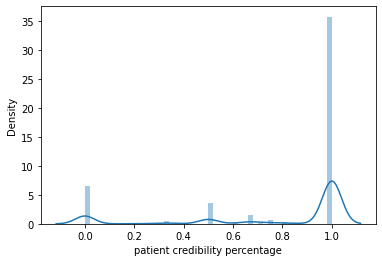

In [17]:
sb.distplot(patient_credibility['patient credibility percentage'])

In [18]:
#supposing that if a person called more than twice and did not show is trustless
#so we can remove them as outliers while making predictions (according to business view)
trustless_patients = ((patient_credibility['total_calls_per_patient'] > 2 ) & 
                      (patient_credibility['patient credibility percentage'] == 0 ))
patient_credibility['trustless_patients']=trustless_patients
sum(patient_credibility['trustless_patients']) #191 out of 62299 patients

191

In [32]:
#Cleaning
#Exploring age
print(sum(Data.Age <0)) 
print(sum(Data.Age >90)) 
print(sum(Data.Age >100)) 

1
308
7


In [33]:
#dropping negative age values
Data[Data.Age < 0 ].index
Data = Data.drop(index= 99832 )

In [35]:
# handcap must be boolean .. so we will drop other values 
Data.Handcap = [int(x) for x in Data.Handcap]
sum(Data.Handcap >1) # 199 patients
indices = Data[Data.Handcap >1].index #indices for patients with handcap values > 1
Data = Data.drop(index=indices)
Data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


## EDA

Attendance percentage = 79.81% 
Absence percentage = 20.19% 


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


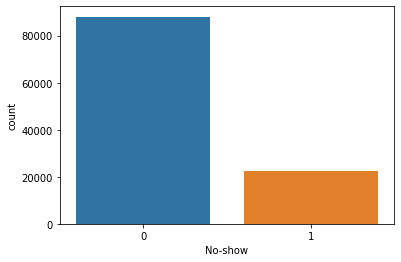

In [38]:
sb.countplot(Data['No-show'])
print("Attendance percentage = {0:0.2f}% ".format(len(Data[Data['No-show']==0])  / (Data.shape[0]) *100))
print("Absence percentage = {0:0.2f}% ".format(len(Data[Data['No-show']==1])  / (Data.shape[0]) *100))

<AxesSubplot:>

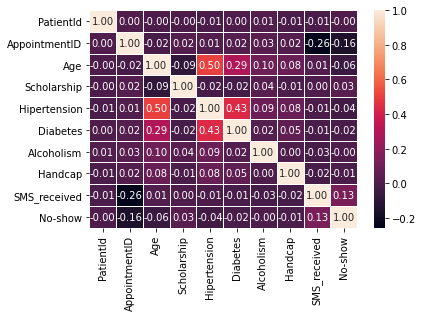

In [40]:
#correlation between features
sb.heatmap(Data.corr(),annot=True,linewidths=1,fmt='0.2f')

poor correlation with dependant variable but we see good correlation between 
age & hipertension , diabetes & hipertension and diabetes & age .. True medical fact 

SMS received attendance percentage = 72.41 %
No SMS received attendance percentage = 83.31 %


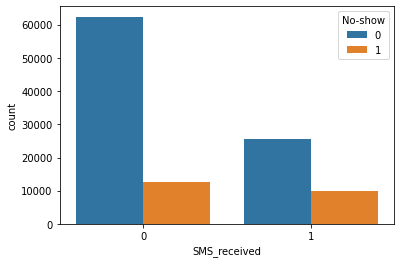

In [41]:
sb.countplot(x=Data['SMS_received'],hue=Data['No-show'])

SMS_received_attendance_percentage = len(Data[(Data['SMS_received']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['SMS_received'] == 1])*100
print('SMS received attendance percentage = {0:0.2f} %'.format(SMS_received_attendance_percentage))

No_SMS_received_attendance_percentage =len(Data[(Data['SMS_received']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['SMS_received'] == 0])*100
print('No SMS received attendance percentage = {0:0.2f} %'.format(No_SMS_received_attendance_percentage))

so the people who already received a SMS are almost divided equally between show and No-show but we have
a higher percentage of attendance for people who didn't receive a SMS
we may run a Matched pair design A/B test to see how SMS affect no-show

Handcap attendance percentage = 82.08 %
No Handcap attendance percentage = 79.76 %


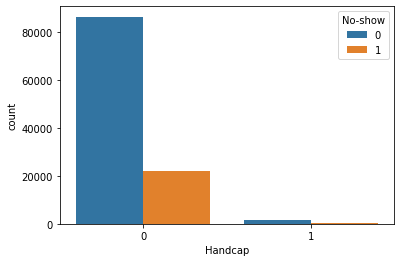

In [42]:
sb.countplot(x=Data['Handcap'],hue=Data['No-show'])

Handcap_attendance_percentage = len(Data[(Data['Handcap']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Handcap'] == 1])*100
print('Handcap attendance percentage = {0:0.2f} %'.format(Handcap_attendance_percentage))

No_Handcap_attendance_percentage =len(Data[(Data['Handcap']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Handcap'] == 0])*100
print('No Handcap attendance percentage = {0:0.2f} %'.format(No_Handcap_attendance_percentage))

we have a higher number of people who had a handcap classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

Alcoholism attendance percentage = 79.86 %
No Alcoholism attendance percentage = 79.81 %


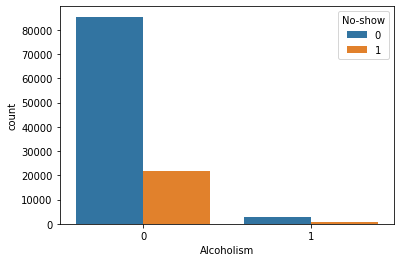

In [43]:
sb.countplot(x=Data['Alcoholism'],hue=Data['No-show'])

Alcoholism_attendance_percentage = len(Data[(Data['Alcoholism']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Alcoholism'] == 1])*100
print('Alcoholism attendance percentage = {0:0.2f} %'.format(Alcoholism_attendance_percentage))

No_Alcoholism_attendance_percentage =len(Data[(Data['Alcoholism']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Alcoholism'] == 0])*100
print('No Alcoholism attendance percentage = {0:0.2f} %'.format(No_Alcoholism_attendance_percentage))

we have a higher number of people who are alcoholists classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are equal

Diabetes attendance percentage = 82.00 %
No Diabetes attendance percentage = 79.64 %


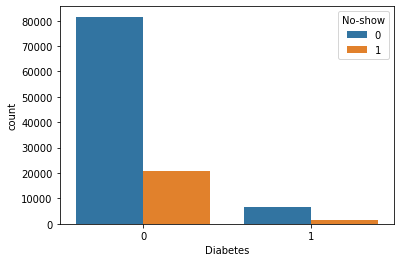

In [44]:
sb.countplot(x=Data['Diabetes'],hue=Data['No-show'])

Diabetes_attendance_percentage = len(Data[(Data['Diabetes']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Diabetes'] == 1])*100
print('Diabetes attendance percentage = {0:0.2f} %'.format(Diabetes_attendance_percentage))

No_Diabetes_attendance_percentage =len(Data[(Data['Diabetes']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Diabetes'] == 0])*100
print('No Diabetes attendance percentage = {0:0.2f} %'.format(No_Diabetes_attendance_percentage))

we have a higher number of people who have diabetes classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

Scholarship attendance percentage = 82.00 %
No Scholarship attendance percentage = 76.23 %


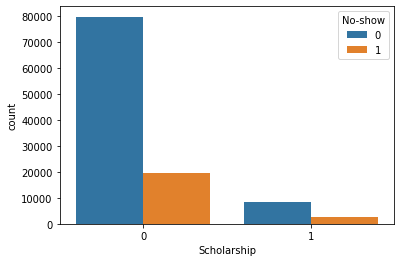

In [45]:
sb.countplot(x=Data['Scholarship'],hue=Data['No-show'])

Scholarship_attendance_percentage = len(Data[(Data['Scholarship']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Scholarship'] == 1])*100
print('Scholarship attendance percentage = {0:0.2f} %'.format(Diabetes_attendance_percentage))

No_Scholarship_attendance_percentage =len(Data[(Data['Scholarship']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Scholarship'] == 0])*100
print('No Scholarship attendance percentage = {0:0.2f} %'.format(Scholarship_attendance_percentage))

we have a higher number of people who have scholarships classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

Hipertension attendance percentage = 82.00 %
No Hipertension attendance percentage = 79.09 %


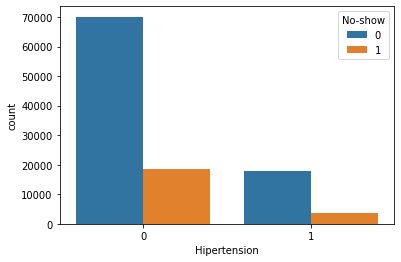

In [47]:
sb.countplot(x=Data['Hipertension'],hue=Data['No-show'])

Hipertension_attendance_percentage = len(Data[(Data['Hipertension']== 1 ) & (Data['No-show']==0)]) / len(Data[Data['Hipertension'] == 1])*100
print('Hipertension attendance percentage = {0:0.2f} %'.format(Diabetes_attendance_percentage))

No_Hipertension_attendance_percentage =len(Data[(Data['Hipertension']== 0 ) & (Data['No-show']==0)]) / len(Data[Data['Hipertension'] == 0])*100
print('No Hipertension attendance percentage = {0:0.2f} %'.format(No_Hipertension_attendance_percentage))

we have a higher number of people who have Hipertension classified as No-show but 
 seems that it doesn't affect No-show as the percents of attendance are almost equal

males attendance percentage = 80.02 %
femles attendance percentage = 79.69 %


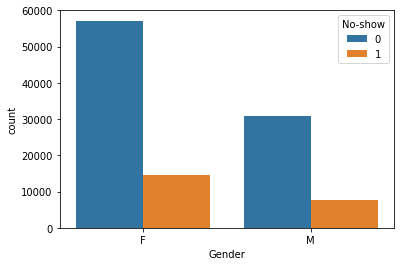

In [48]:
sb.countplot(x=Data['Gender'],hue=Data['No-show'])

males_attendance_percentage = len(Data[(Data.Gender == 'M') & (Data['No-show']==0)]) / len(Data[Data.Gender == 'M'])*100
print('males attendance percentage = {0:0.2f} %'.format(males_attendance_percentage))

females_attendance_percentage = len(Data[(Data.Gender == 'F') & (Data['No-show']==0)]) / len(Data[Data.Gender == 'F'])*100
print('femles attendance percentage = {0:0.2f} %'.format(females_attendance_percentage))

altough number of female patients are almost twice the number of male patients but we have almost 
    equal percentage of attendance for both

In [49]:
#we have 81 neighbourhood so we couldn't show in a plot 
#but we will see what neighbourhoods have the highest and the lowesr percents of attendance 

Neighbourhoods_names = Data.Neighbourhood.unique()
Neighbourhoods = []
Neighbourhood_attendance_percentage = []
for i in Neighbourhoods_names:
    Neighbourhood = str(i)
    Neighbourhood_attendance_per = len(Data[(Data.Neighbourhood == str(i)) & (Data['No-show']==0)]) / len(Data[Data.Neighbourhood ==str(i)])*100
    Neighbourhoods.append(Neighbourhood)
    Neighbourhood_attendance_percentage.append(Neighbourhood_attendance_per)

In [50]:
Neighbourhoods_attendance_percentages = pd.DataFrame(data=Neighbourhoods_names,columns=['Neighbourhood']) 
Neighbourhoods_attendance_percentages['Percentage']= np.array(Neighbourhood_attendance_percentage).round()
Neighbourhoods_attendance_percentages = Neighbourhoods_attendance_percentages.sort_values(by='Percentage',)
Neighbourhoods_attendance_percentages['Percentage'].describe(include='all')

count     81.000000
mean      79.444444
std        9.712106
min        0.000000
25%       78.000000
50%       80.000000
75%       82.000000
max      100.000000
Name: Percentage, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percentage', ylabel='Density'>

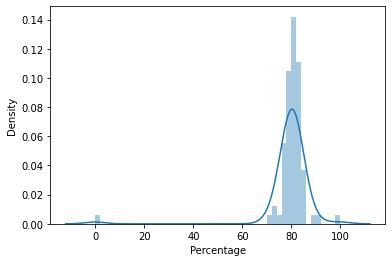

In [51]:
sb.distplot(Neighbourhoods_attendance_percentages['Percentage'])

so we have an average attendance of 79.5% per each neighbourhood but we have high standard deviation
because we have some neighbour close to 100 percent 

In [52]:
#checking neighbourhoods attendance percentages away from the mean (outliers)
Neighbourhoods_attendance_percentages[Neighbourhoods_attendance_percentages['Percentage'] > 90]

,Neighbourhood,Percentage
75,ILHA DO BOI,91.0
80,PARQUE INDUSTRIAL,100.0


In [54]:
print(len(Data[(Data.Neighbourhood =='ILHA DO BOI' ) & (Data['No-show']==0)]))
print(len(Data[Data.Neighbourhood =='ILHA DO BOI'])) # 32 out of 35 attended the appointment

32
35


In [55]:
print(len(Data[(Data.Neighbourhood =='PARQUE INDUSTRIAL' ) & (Data['No-show']==0)]))
print(len(Data[Data.Neighbourhood =='PARQUE INDUSTRIAL'])) 
# there is only one patient from this neighbourhood

1
1


In [57]:
print(Neighbourhoods_attendance_percentages[Neighbourhoods_attendance_percentages['Percentage'] < 10])
print(len(Data[(Data.Neighbourhood =='ILHAS OCEÂNICAS DE TRINDADE' ) & (Data['No-show']==0)]))
# there is no patients in this neighbourhood

                  Neighbourhood  Percentage
79  ILHAS OCEÂNICAS DE TRINDADE         0.0
0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='No-show', ylabel='Age'>

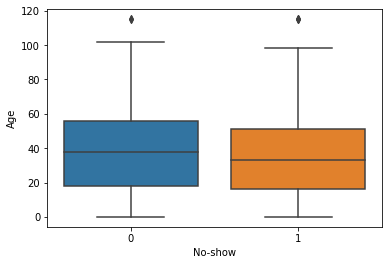

In [58]:
sb.boxplot(Data['No-show'],Data['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

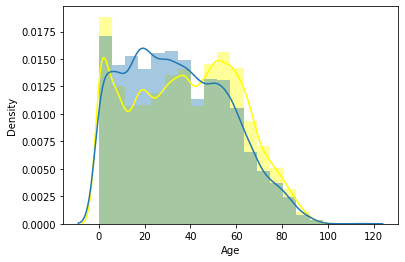

In [62]:
# comparing the age distributions for both No-show and show
sb.distplot(Data['Age'][Data['No-show'] == 0],bins=20,color='yellow') 
sb.distplot(Data['Age'][Data['No-show'] == 1],bins=20)

seems that from 10 years to 40 years more people will ignore their appointments as the graph show a higher freqencies @ the blue curve in this period .. this is real fact as in this years everyone be more youth and powerful ... and at the first 5 years the patients attend ( the yellow curve shows higher density ) as thier parents care about them ... same for people above 45 we see higher density at the yellow curve meaning that they are more careful about attendence and their health